<a href="https://colab.research.google.com/github/riya-maurya/EV_Market_Segmentation/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Importing Dataset

In [ ]:

import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/ev_charging_patterns.csv')

# Display the first 5 rows to check the data
print(df.head())



  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363        

In [ ]:

# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numeric_cols = [
    'Battery Capacity (kWh)', 'Charging Duration (hours)', 'Charging Cost (USD)',
    'Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)',
    'State of Charge (Start %)', 'State of Charge (End %)', 'Temperature (°C)', 'Vehicle Age (years)'
]

categorical_cols = ['Charger Type', 'Time of Day', 'User Type']
# Handle missing values in numeric columns (fill with mean)
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)


# One-hot encode categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Scale numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# Combine numeric and categorical data
X = pd.concat([df_scaled, df_encoded.reset_index(drop=True)], axis=1)

# Check final data shape
print("Preprocessed data shape:", X.shape)

Preprocessed data shape: (1320, 17)


<ipython-input-16-128426da7ae4>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### Apply KMeans Clustering


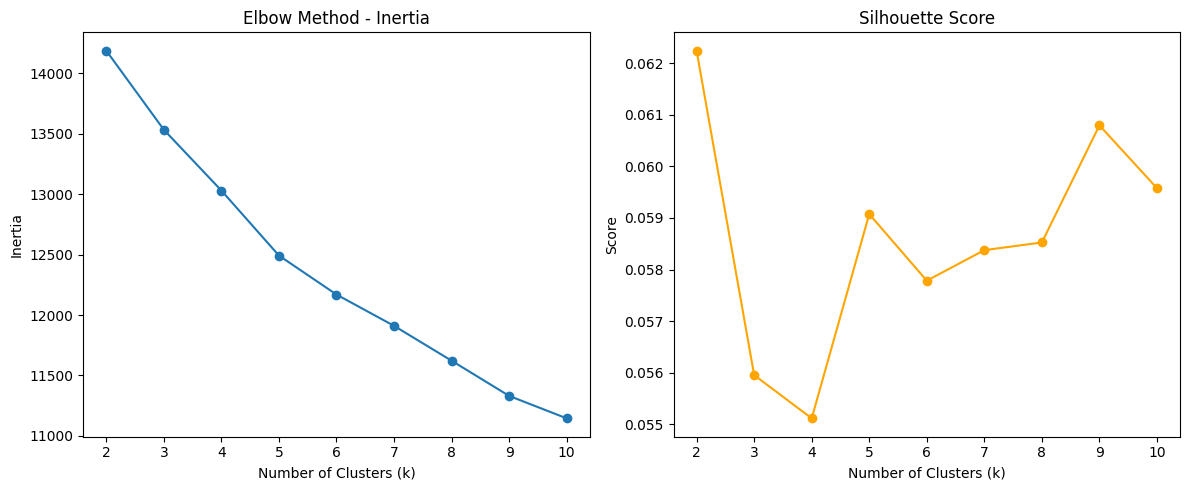

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different cluster numbers to find the best one (elbow method)
inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


## Clustering with k=5 and PCA Visualization

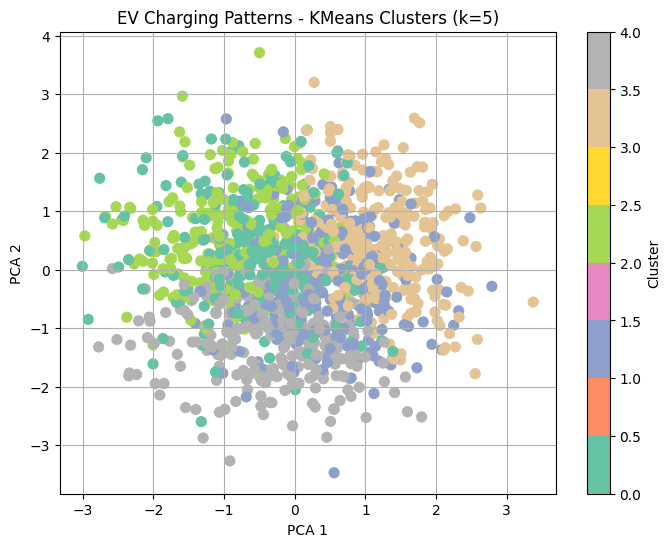

In [ ]:

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
df['Cluster'] = clusters

# Now use PCA to reduce dimensions for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('EV Charging Patterns - KMeans Clusters (k=5)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


### Understanding Each Cluster

In [ ]:
# Get mean values per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

# Display summary
cluster_summary


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
Cluster,,,,,,,,,,
0,89.080660,43.082492,2.068051,32.712746,19.571353,31.109614,75.070703,89.718297,13.676615,3.161247
1,70.240492,38.898326,1.808183,25.226734,17.324348,72.524147,69.896470,143.503221,9.125011,3.004304
2,71.254030,52.396039,3.115557,19.077695,18.481908,42.941744,83.729647,176.133459,7.191841,4.861444
3,71.608572,43.123646,2.082964,23.201145,29.576523,57.326416,75.540930,118.183944,28.318257,4.974694
4,71.226795,36.875683,2.366933,29.369577,26.700722,39.488720,72.448059,240.465648,16.199018,2.107896
